# Current Exploratory Data Analysis (EDA) of Urban Mobility in the Largest Brazilian Capitals
The present study aims to conduct an analysis of urban mobility in the 9 largest metropolitan regions of Brazil.


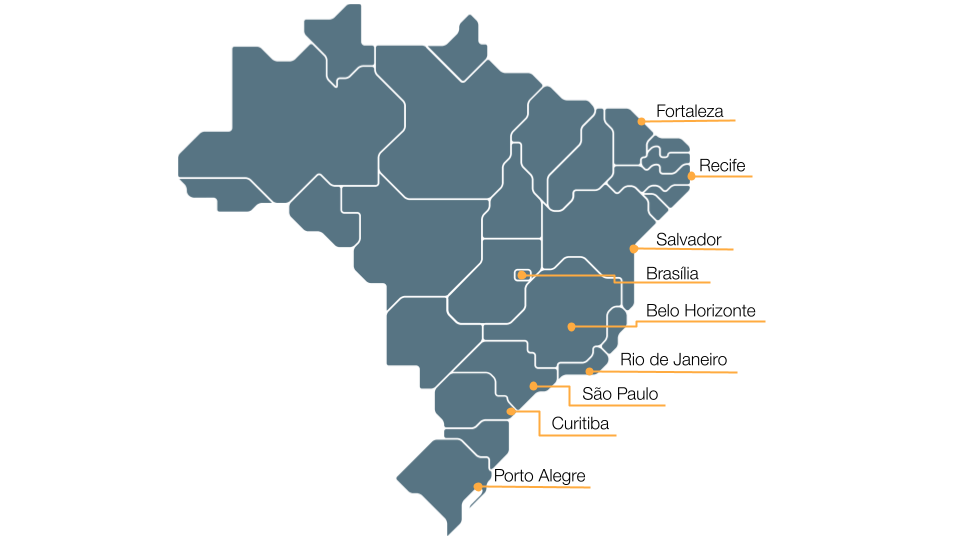

With the rising cost of living in the city centers, a migratory phenomenon is being observed: people who used to live or were looking for housing in the metropolitan capitals are now choosing to live in their peripheries and satellite cities.

This phenomenon is caused by the rising cost of living in the central regions of cities, leading people to seek housing with lower costs in more distant locations. Therefore, even with the greater job offer still concentrated in the city centers, workers need to travel long distances to get to work and return home.

In this study, we will conduct an exploratory data analysis of the public transportation situation in the Metropolitan Regions (MRs) of São Paulo, Rio de Janeiro, Belo Horizonte, Brasília, Salvador, Fortaleza, Recife, Curitiba, and Porto Alegre, with the objective of understanding the urban reality of the citizens of the respective metropolitan regions.

## 1. Datasets

The data we will use has been divided into two datasets. The first contains annual information, from 2015 to 2023, with variables such as fare prices, motorization rates, and others. The second dataset contains current information, such as travel time on public transportation, distance traveled, and others. We will also use demographic data from the 2000, 2010, and 2022 censuses.

All data was obtained from government platforms and agencies such as Mobilidados, NTU (National Association of Urban Transportation Companies), and the respective Traffic Departments of each city analyzed here

###1.1 Loading Libraries and Datasets

Initiating our analysis by loading libraries in Python

To begin our analysis, we'll import the necessary libraries into our Python environment. The libraries we'll be using are: Pandas, NumPy, Matplotlib.pyplot, and Seaborn.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import os
os.chdir('/content/drive/MyDrive/Projeto Mobilidade Urbana')

#### 1.1.1. Database: Censos

In [21]:
censo = pd.read_csv("Censos.csv", encoding='latin-1')
censo.head(10)

,regiao_metropolitana,ano,populacao,var
0,Sao Paulo,2000,17879997,NaN
1,Sao Paulo,2010,19683975,10.08
2,Sao Paulo,2022,20743587,5.38
3,Rio de Janeiro,2000,11254026,NaN
4,Rio de Janeiro,2010,12245449,8.80
5,Rio de Janeiro,2022,12022110,-1.82
6,Belo Horizonte,2000,4358171,NaN
7,Belo Horizonte,2010,4883970,12.06
8,Belo Horizonte,2022,5127694,4.99
9,Brasilia,2000,3118030,NaN


Our dataset encompasses information from the last three censuses conducted in Brazil by the Brazilian Institute of Geography and Statistics (IBGE). It contains the following variables:

* regiao_metropolitana: This variable identifies the nine largest metropolitan

* regions in the country.

* ano: This variable represents the year of the census.

* populacao: This variable indicates the size of the Brazilian population in each census.

* var: This variable represents the population variation compared to the previous census.

####1.1.2. Database: Tarifas

In [22]:
tarifas = pd.read_csv("Tarifas.csv", encoding='latin-1')
tarifas.head(10)

,cidade,ano,tarifa_onibus,tarifa_metro,motorizacao
0,Sao Paulo,2015,3.5,3.5,552.0
1,Sao Paulo,2016,3.8,3.8,563.0
2,Sao Paulo,2017,3.8,3.8,576.0
3,Sao Paulo,2018,4.0,4.0,590.0
4,Sao Paulo,2019,4.3,4.3,605.0
5,Sao Paulo,2020,4.4,4.4,614.0
6,Sao Paulo,2021,4.4,4.4,620.0
7,Sao Paulo,2022,4.4,4.4,673.0
8,Sao Paulo,2023,4.4,4.4,NaN
9,Rio de Janeiro,2015,3.4,3.7,344.0


Our dataset encompasses information on public transportation fares and motorization rates in the nine metropolitan regions under study. It contains the following variables:

* cidades: This variable identifies the capital cities of each metropolitan region analyzed in this study.

* ano: This variable represents the year for which the following information is provided (2015-2023).

* tarifa_onibus: This variable indicates the price of bus fares in each year.

* tarifa_metro: This variable represents the price of metro fares in each year.

* motorizacao: This variable indicates the number of vehicles per 1,000 inhabitants in each year.

#### Database: Dados

In [23]:
dados = pd.read_csv("Dados 2022.csv", encoding='latin-1')
dados.head(10)

,regiao_metropolitana,tempo_locomocao,distancia_percorrida,tamanho_rede,ticket_medio,por_cento_salario
0,Sao Paulo,62,7.45,260.2,264.0,18.69
1,Rio de Janeiro,67,11.42,300.4,258.0,18.27
2,Belo Horizonte,61,7.82,50.2,315.0,22.30
3,Brasilia,58,12.41,62.7,330.0,23.37
4,Salvador,54,7.10,33.9,312.0,22.73
5,Fortaleza,54,6.48,28.6,270.0,19.12
6,Recife,64,8.22,34.2,246.0,17.42
7,Curitiba,57,8.00,78.8,360.0,25.49
8,Porto Alegre,47,8.18,48.1,288.0,20.39


This dataset encompasses current information on public transportation in the nine metropolitan regions under study. It contains the following variables:

* regiao_metropolitana: This variable identifies the metropolitan region.

* tempo_locomocao: This variable represents the average travel time of residents on public transportation, given in minutes.

* distancia_percorrida: This variable indicates the average distance that residents travel on public transportation, given in kilometers.

* tamanho_rede: This variable represents the size of the public transportation network, including metro and BRT, given in kilometers.

* ticket_medio: This variable indicates the average amount that residents spend on public transportation per month.

* por_cento_salario: This variable represents the percentage of an average resident's monthly salary spent on public transportation in relation to the minimum wage.

##2. Analysis
First, let's plot data from our census dataset to visualize how the population has grown since the year 2000.

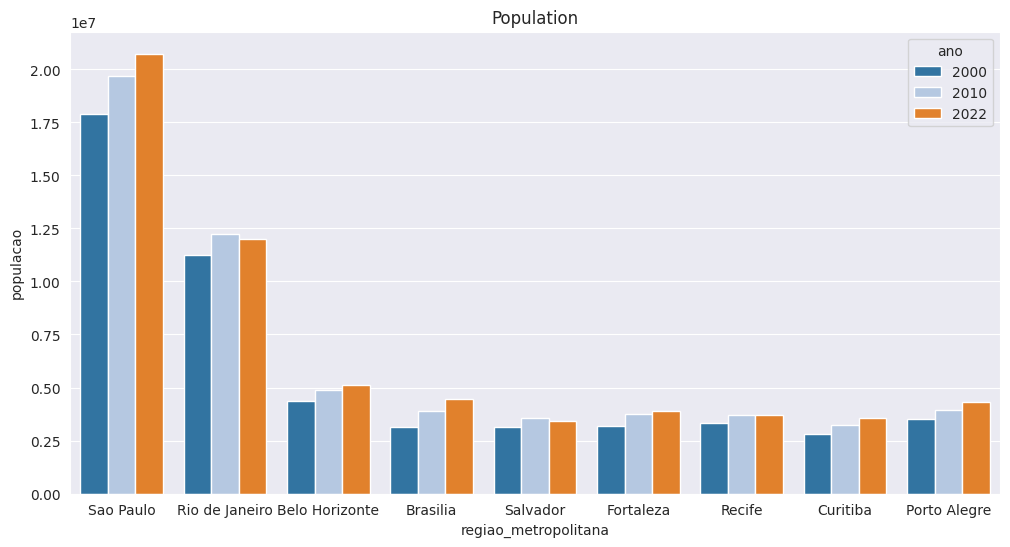

In [24]:
fig,ax= plt.subplots(figsize=(12,6))
ax = sns.barplot(data = censo, x="regiao_metropolitana", y= "populacao", hue = 'ano', palette = "tab20")
ax.set_title("Population")
plt.show()

It can be observed that most metropolitan regions have experienced significant growth during the 22 years since 2000, with the exception of three cities: Salvador, Rio de Janeiro, and Recife. The population of the Salvador and Rio de Janeiro metropolitan regions decreased between 2010 and 2022, and the population of the Recife metropolitan region did not show substantial growth.

For a better visualization, let's analyze a graph that shows the population variation between the censuses

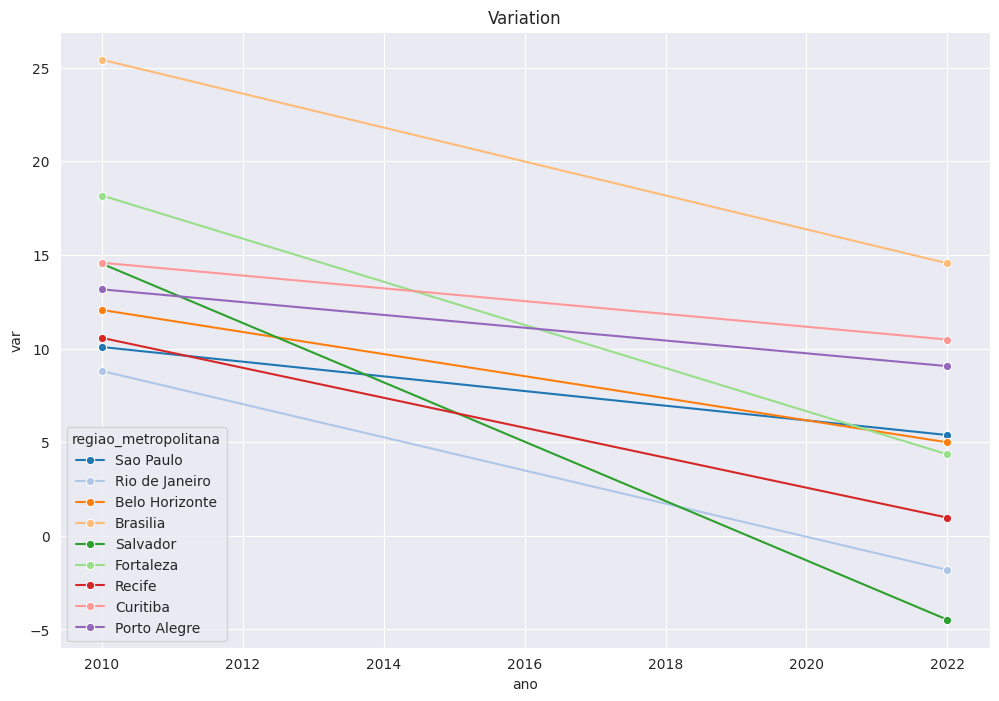

In [25]:
fig,ax= plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
ax = sns.lineplot(data = censo, x="ano", y= "var", hue = 'regiao_metropolitana', marker = "o", palette = "tab20")
ax.set_title("Variation")
plt.show()

Therefore, we can observe that the Rio de Janeiro and Salvador Metropolitan Regions (MRs) experienced a negative growth rate, meaning that there was a population decline between 2010 and 2022. We can also observe the stagnant growth of the Recife RM, with its rate close to zero.

The Brasília and Curitiba RMs were the ones that showed the highest growth rates in 2022.

Based on this information, we will analyze whether a significant population decrease influences the motorization rate.

### 2.1. Evolution of the Motorization Rate in Cities


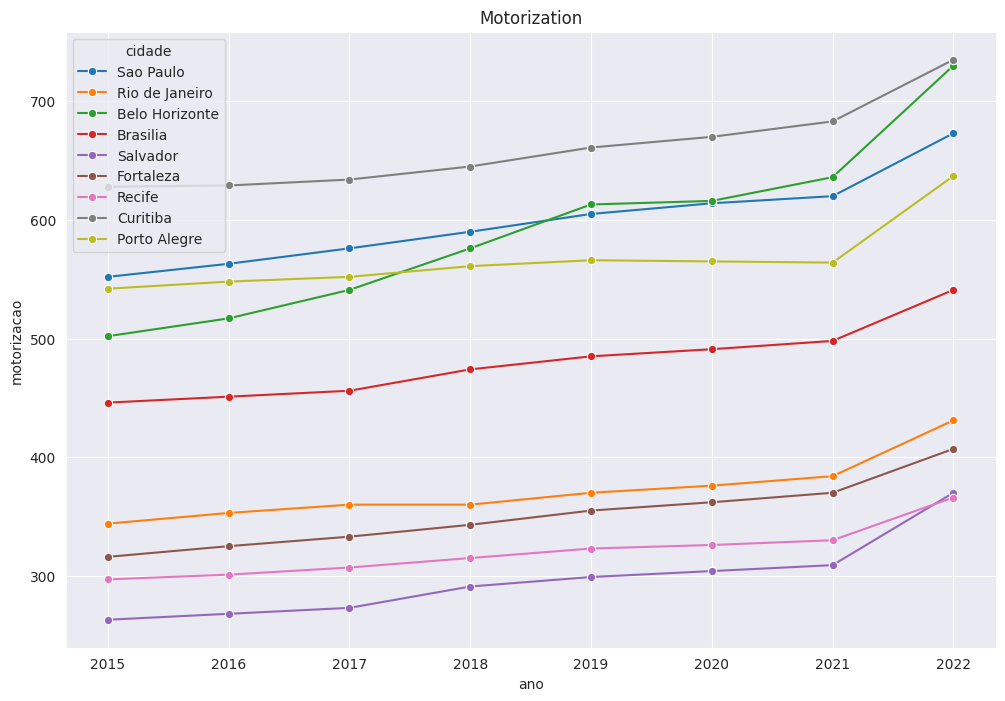

In [26]:
fig,ax= plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
ax = sns.lineplot(data = tarifas, x="ano", y= "motorizacao", hue = 'cidade', marker = "o", palette = "tab10")
ax.set_title("Motorization")
plt.show()

In the graph, we can observe that regardless of the population growth or decline in the cities, all of them showed an increase in the motorization rate. Belo Horizonte recorded the highest increase in the motorization rate between 2015 and 2022, while Curitiba stands out as the MR with the highest rate in the country.
As observed, after 2021, there is a significant jump in the motorization rate in the MRs. To investigate the possible causes of this phenomenon, we will analyze the correlation between the motorization rate and the bus fare practiced in each city between 2021 and 2022.


            cidade   ano  tarifa_onibus  tarifa_metro  motorizacao
80    Porto Alegre  2023           4.80           4.5          NaN
44        Salvador  2023           5.20           4.1          NaN
35        Brasilia  2023           5.50           5.5          NaN
53       Fortaleza  2023           4.50           3.6          NaN
8        Sao Paulo  2023           4.40           4.4          NaN
..             ...   ...            ...           ...          ...
54          Recife  2015           3.35           1.6        297.0
36        Salvador  2015           3.00           NaN        263.0
9   Rio de Janeiro  2015           3.40           3.7        344.0
45       Fortaleza  2015           2.75           2.4        316.0
0        Sao Paulo  2015           3.50           3.5        552.0

[81 rows x 5 columns]


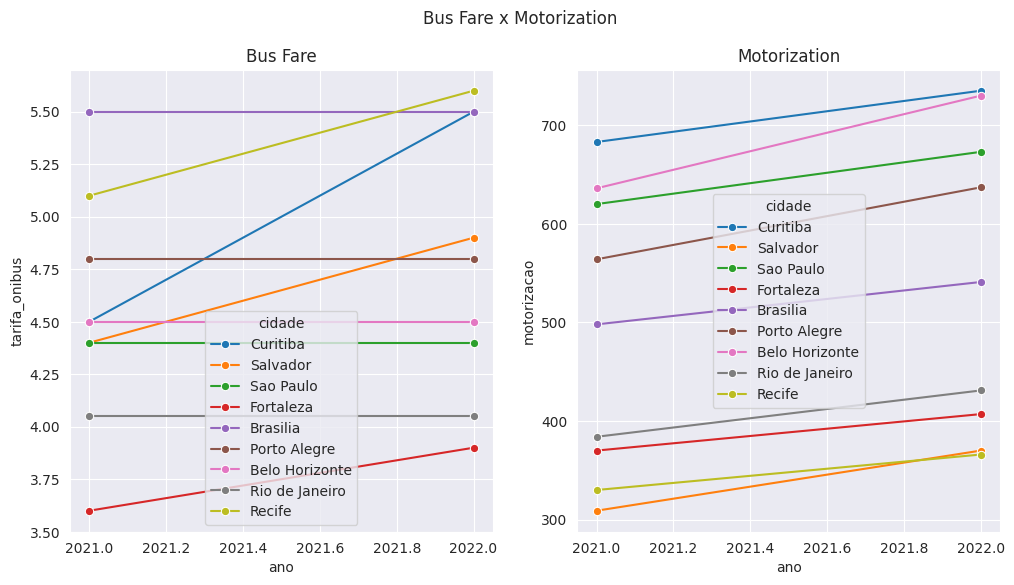

In [27]:
tarifas_sorted = tarifas.sort_values("ano", ascending = False)
print(tarifas_sorted)

intervalo = tarifas_sorted.iloc[9:27,]
intervalo = intervalo.sort_values("ano", ascending = True)
intervalo.head(20)

fig, axes = plt.subplots(1,2, sharex = True, figsize = (12,6))
fig.suptitle("Bus Fare x Motorization")
axes[0].set_title("Bus Fare")
axes[1].set_title("Motorization")

sns.lineplot(ax = axes[0],
             data = intervalo,
             x = "ano",
             y ='tarifa_onibus',
             hue = 'cidade',
             palette = 'tab10',
             marker = 'o')

sns.lineplot(ax = axes[1],
             data = intervalo,
             x = 'ano',
             y = 'motorizacao',
             hue = 'cidade',
             palette = "tab10",
             marker = 'o')

plt.show()

To create the graphs, we first created a new dataset called "Intervalo", using the 'Tarifas' dataset as a basis. Then, we selected the data for the years 2021 and 2022, allowing us to analyze the data exclusively for this period.

When analyzing the graphs, we observed that only four RMs registered an increase in the price of fares, while five others kept the prices unchanged. Among the cities that showed growth in the motorization rate, we highlight Belo Horizonte and Porto Alegre, which had the largest increases in the rate, even with the fare kept at the same value in 2021 and 2022.

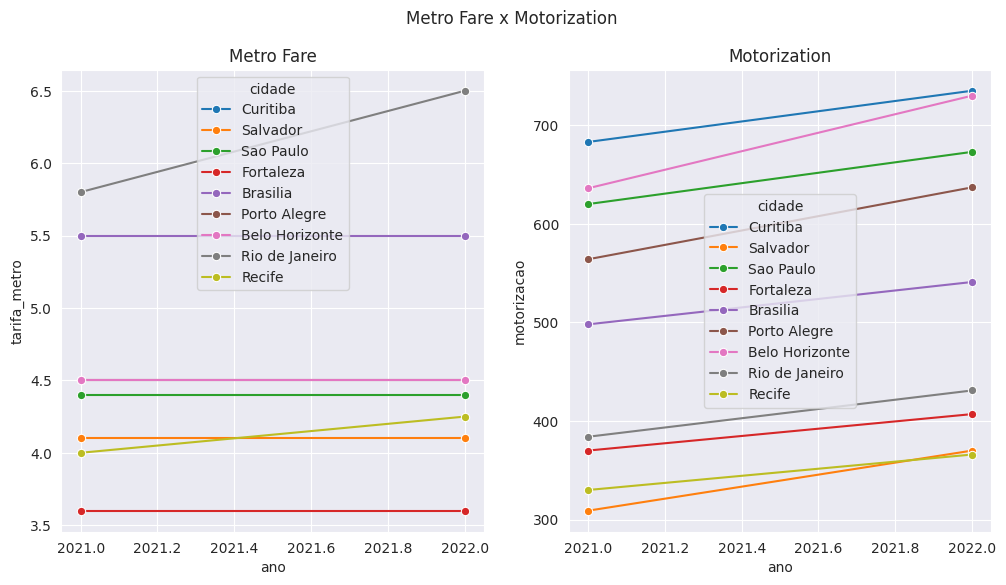

In [28]:
fig, axes = plt.subplots(1,2, sharex = True, figsize = (12,6))
fig.suptitle("Metro Fare x Motorization")
axes[0].set_title("Metro Fare")
axes[1].set_title("Motorization")

sns.lineplot(ax = axes[0],
             data = intervalo,
             x = "ano",
             y ='tarifa_metro',
             hue = 'cidade',
             palette = 'tab10',
             marker = 'o')

sns.lineplot(ax = axes[1],
             data = intervalo,
             x = 'ano',
             y = 'motorizacao',
             hue = 'cidade',
             palette = "tab10",
             marker = 'o')

plt.show()

Over the two years, only the cities of Recife and Rio de Janeiro increased the price of subway tickets. It is worth noting that both cities recorded two of the lowest motorization rates among those analyzed.

In [29]:
correlacao = tarifas['tarifa_onibus'].corr(tarifas['motorizacao'])
print(correlacao)

0.35540197008432084


Thus, based on the Pearson correlation coefficient, we can conclude that the fluctuation in the motorization rate shows a weak correlation with the price of bus fares.

### 2.2. Analysis of Urban Mobility in the Past Year
In our upcoming analyses, we will introduce the "Dados 2023" dataset, with the aim of obtaining an updated overview of the public transportation situation in these cities.

First, we will analyze bus and subway fares in the cities in 2023. Then, we will continue to analyze the "Dados 2023" dataset.



<ipython-input-30-f5de859a33b5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = intervalo, x = 'cidade', y = 'tarifa_onibus', palette= 'Set2' )


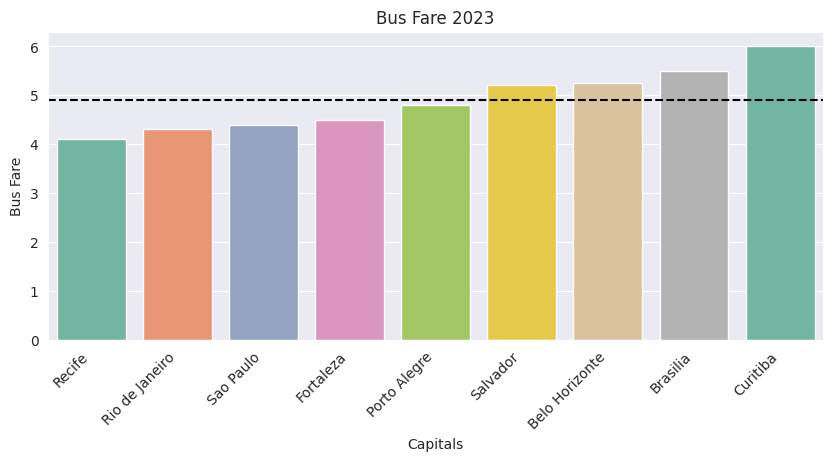

In [30]:
tarifas_sorted = tarifas.sort_values("ano", ascending = False)
intervalo = tarifas_sorted.iloc[0:9,]
intervalo = intervalo.sort_values("tarifa_onibus", ascending = True)
media_onibus = intervalo["tarifa_onibus"].mean()

fig,ax= plt.subplots(figsize=(10,4))
sns.set_style('darkgrid')
ax = sns.barplot(data = intervalo, x = 'cidade', y = 'tarifa_onibus', palette= 'Set2' )
ax.axhline(y=media_onibus, color='black', linestyle='--', label='Média')
plt.title("Bus Fare 2023")
plt.xlabel("Capitals")
plt.ylabel("Bus Fare")
plt.xticks(rotation = 45, ha="right")
plt.show()

With an average bus fare of 4.89, four of the nine cities analyzed have fares above the average. Curitiba has the most expensive fare, costing 6.00, while Recife has the lowest fare, at 4.10.

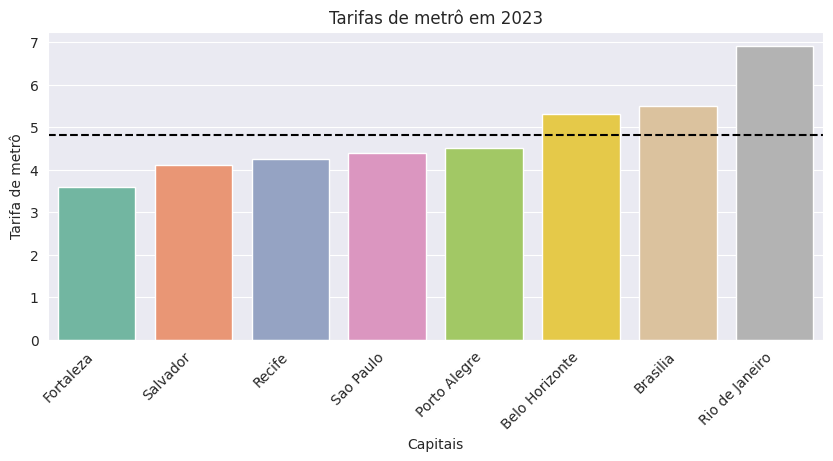

In [31]:
intervalo = intervalo.sort_values("tarifa_metro", ascending = True)
intervalo = intervalo.dropna(subset = ["tarifa_metro"])
media_metro = intervalo["tarifa_metro"].mean()

fig,ax= plt.subplots(figsize=(10,4))
sns.set_style('darkgrid')
ax = sns.barplot(data = intervalo, x = 'cidade', y = 'tarifa_metro', palette= 'Set2', hue = "cidade")
ax.axhline(y=media_metro, color='black', linestyle='--', label='Média')
plt.title("Tarifas de metrô em 2023")
plt.xlabel("Capitais")
plt.ylabel("Tarifa de metrô")
plt.xticks(rotation = 45, ha="right")
plt.show()

Due to the absence of a subway system in Curitiba, only eight cities were analyzed in this graph. With an average fare price of 4.89, three cities ended the year 2023 with prices above the average. Rio de Janeiro has the most expensive fare, at 6.90, while Fortaleza has the lowest fare, at 3.60.

Next, we will extract some information from our last dataset to be analyzed.

In [32]:
dados.describe()

,tempo_locomocao,distancia_percorrida,tamanho_rede,ticket_medio,por_cento_salario
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,58.222222,8.564444,99.677778,293.666667,20.864444
std,6.078194,1.994155,104.063956,37.960506,2.734191
min,47.000000,6.480000,28.600000,246.000000,17.420000
25%,54.000000,7.450000,34.200000,264.000000,18.690000
50%,58.000000,8.000000,50.200000,288.000000,20.390000
75%,62.000000,8.220000,78.800000,315.000000,22.730000
max,67.000000,12.410000,300.400000,360.000000,25.490000


Upon analyzing the table, we observed the following information:

* Residents of these metropolitan regions spend an average of 28.86% of a minimum wage on transportation per month.

* The average time spent using public transportation is 58.22 minutes (or 58 minutes and 13 seconds).

* The high standard deviation of the size of the transportation network indicates a high dispersion of data in the set.

To better visualize the information, we will plot some graphs.

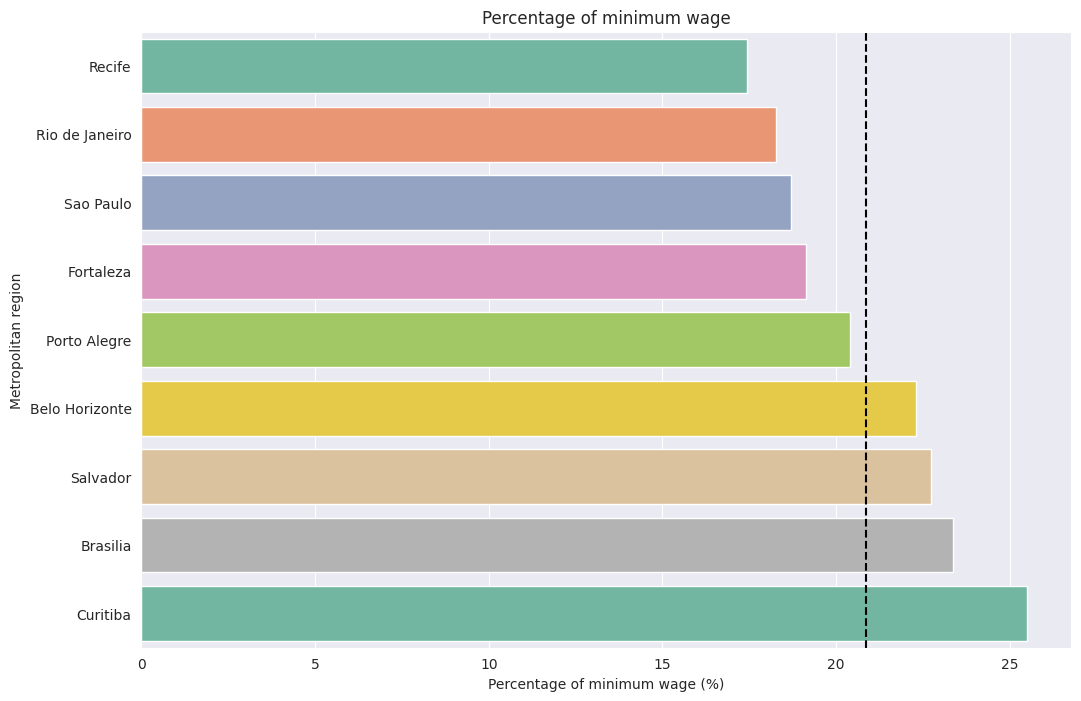

In [33]:
dados_salario= dados.sort_values("por_cento_salario", ascending = True)
media_salario= dados["por_cento_salario"].mean()

fig, ax= plt.subplots(figsize= (12,8))
sns.set_style('darkgrid')
ax= sns.barplot(data= dados_salario, x= "por_cento_salario", y= 'regiao_metropolitana', hue= 'regiao_metropolitana', palette = 'Set2')
ax.axvline(x= media_salario, color='black', linestyle='--', label='Média')
plt.title("Percentage of minimum wage")
plt.xlabel("Percentage of minimum wage (%)")
plt.ylabel("Metropolitan region")
plt.show()

In the graph, we can observe the metropolitan regions with the highest and lowest percentages of monthly transportation expenses for the population in relation to the minimum wage. Curitiba has the most expensive transportation among the metropolitan regions analyzed, exceeding 25% of the minimum wage, followed by Brasília and Belo Horizonte. On the other hand, Recife has the lowest expense, representing approximately 17.5% of the minimum wage. The dashed line represents the average percentage, with four cities presenting prices above this average.

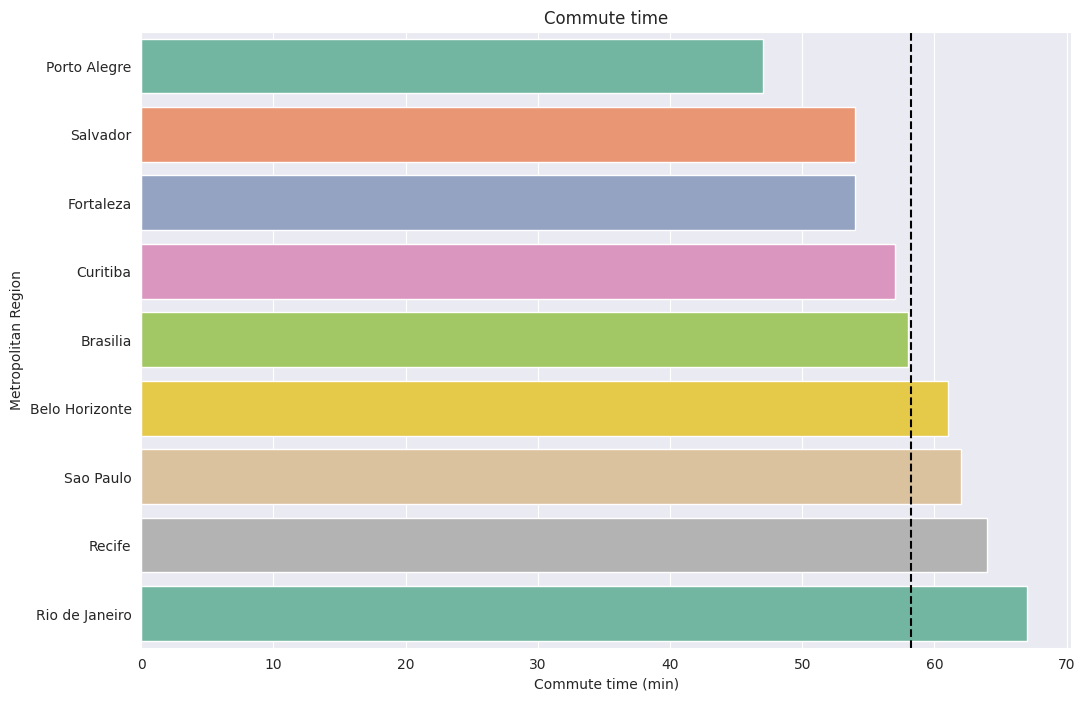

In [34]:
dados_tempo= dados.sort_values("tempo_locomocao", ascending = True)
media_tempo= dados["tempo_locomocao"].mean()

fig, ax= plt.subplots(figsize= (12,8))
sns.set_style('darkgrid')
ax= sns.barplot(data= dados_tempo, x= "tempo_locomocao", y= 'regiao_metropolitana', hue= 'regiao_metropolitana', palette = 'Set2')
ax.axvline(x= media_tempo, color='black', linestyle='--', label='Média')
plt.title("Commute time")
plt.xlabel("Commute time (min)")
plt.ylabel("Metropolitan Region")
plt.show()

Upon analyzing the graph, we can observe that four metropolitan regions recorded an average commute time of over one hour. The Rio de Janeiro metropolitan region leads, with an average time of one hour and seven minutes, followed by Recife. The three largest metropolitan regions in the country (São Paulo, Rio de Janeiro, and Belo Horizonte, in that order) recorded times above one hour, also above the national average of 58.22 minutes. São Paulo, known for its heavy traffic jams, appears only in third place.

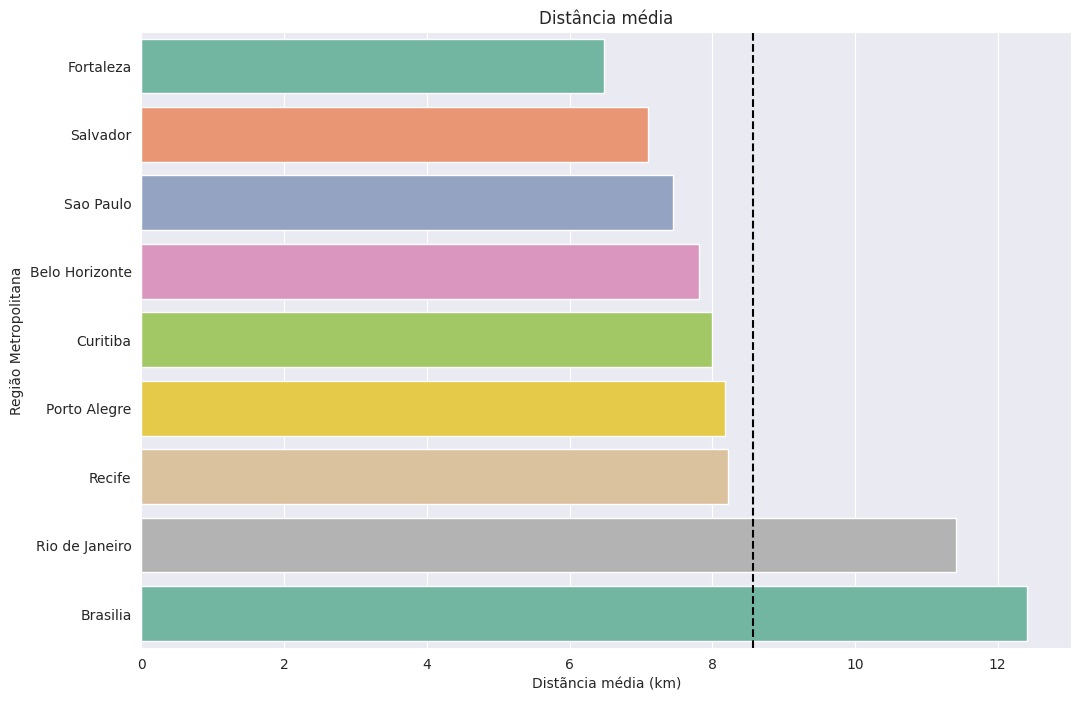

In [35]:
dados_distancia = dados.sort_values("distancia_percorrida", ascending = True)
media_distancia = dados["distancia_percorrida"].mean()

fig, ax= plt.subplots(figsize= (12,8))
sns.set_style('darkgrid')
ax = sns.barplot(data = dados_distancia, x = 'distancia_percorrida', y = 'regiao_metropolitana', hue = 'regiao_metropolitana', palette = "Set2")
ax.axvline(x= media_distancia, color='black', linestyle='--', label='Média')
plt.title("Distância média")
plt.xlabel("Distãncia média (km)")
plt.ylabel("Região Metropolitana")
plt.show()

However, when analyzing the average distance graph, we notice that São Paulo records one of the shortest average distances traveled by its residents on public transportation. Brasília leads, with an average distance exceeding 12 kilometers, and, along with Rio de Janeiro, presents a distance above the average.

To better understand the standard deviation, we will plot a histogram, visualizing the distribution of our data.

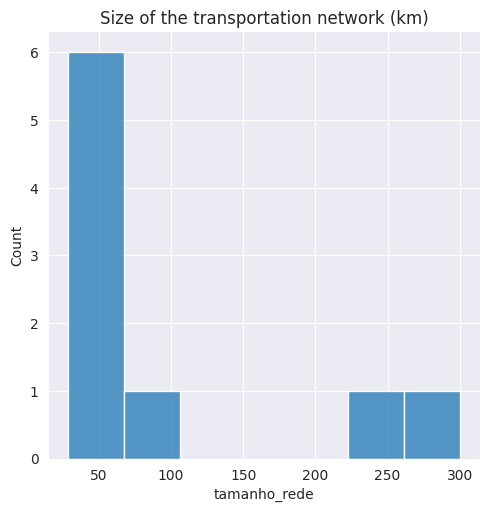

In [36]:
sns.displot(dados["tamanho_rede"])
plt.title("Size of the transportation network (km)")
plt.show()

Now, we understand the high standard deviation observed. This is due to the poor distribution of the data, with a left skew. That is, while there are a few very high values, most are concentrated in low values. Therefore, we can conclude that the size of the transportation network in the nine metropolitan regions has a dispersed distribution, with few cities having large road infrastructure and many with little infrastructure.

## 3. Conclusion

Based on the analyses presented, we can conclude that:

* The growth rate of large cities has been decreasing each year.
* An increase in public transportation fares does not necessarily lead to an increase in the motorization rate of a city; other factors need to be taken into account.
* The two largest metropolitan regions in the country concentrate the majority of public transportation infrastructure, resulting in a significant disparity compared to the other seven metropolitan regions analyzed in this study.